## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = \arg\max_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here (5 points)**   

##################################     
TODO: Derive you answer hear
#################################

Using svm loss function

$L = \sum_{i=1}^N max(0, W_i*x_i + b - W_{y_i}*x_i - b)$ = $\sum_{i=1}^N max(0, W_i*x_i - W_{y_i}*x_i)$


$$ \frac{dL}{dW_i}=\left\{
\begin{aligned}
0 &  & L \leq 0~or~other\\
x & & if~i~is~the~wrong~predicted~label \\
-x & & if~i~is~the~right~label
\end{aligned}
\right.
$$

$$\begin{aligned} \frac{dL}{db} = 0\end{aligned}  $$                

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [2]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))


<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [3]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_test.shape)
print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (45,)
<class 'numpy.ndarray'>


In [27]:
class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    
    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []
          
    def initial_weight(self, weight_dimension, num_cls):
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  small std and zero mean gaussian   ##
        #########################################
        weight = np.zeros((num_cls,weight_dimension + 1 ))
        return weight
        
    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normlize the data        ##
        #####################################
        norm_data = (data-self.sample_mean)/self.sample_std
        return norm_data
    
    def train_step(self, X_train, y_train, shuffle_idx):
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        train_acc = 0

        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################
        dw = np.zeros_like(self.weight)

        for i in range(X_train.shape[0]):
            scores = np.dot(self.weight, X_train[i].transpose())
            predicted_label = np.argmax(scores)
            if (predicted_label != y_train[i] ):
                dw[predicted_label] += self.lr * X_train[i]
                dw[y_train[i]] -= self.lr * X_train[i]
            else:
                train_acc += 1
        self.weight -= dw
        train_acc /= X_train.shape[0]
        return train_acc
        
    def test_step(self, X_test, y_test):
        
        num_sample = X_test.shape[0]
        test_acc = 0
        
        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################
        for i in range(num_sample):
            scores = np.dot(self.weight, X_test[i].transpose())
            predicted_label = np.argmax(scores)
            if (predicted_label == y_test[i]):
                test_acc += 1

        test_acc /= X_test.shape[0]
        return test_acc
        
    def train(self):
           
        self.X_train = self.data_preprocessing(data=self.X_train)
        self.X_test = self.data_preprocessing(data=self.X_test)

        num_sample = self.X_train.shape[0]
        
        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################
        self.X_train = np.concatenate((self.X_train, np.ones((self.X_train.shape[0],1))), axis=1)
        self.X_test = np.concatenate((self.X_test, np.ones((self.X_test.shape[0],1))), axis=1)
        
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()

epoch: 0 traing_acc:0.324 tst_acc:0.711
epoch: 1 traing_acc:0.819 tst_acc:0.889
epoch: 2 traing_acc:0.857 tst_acc:0.956
epoch: 3 traing_acc:0.914 tst_acc:0.911
epoch: 4 traing_acc:0.905 tst_acc:0.711
epoch: 5 traing_acc:0.848 tst_acc:0.867
epoch: 6 traing_acc:0.819 tst_acc:0.622
epoch: 7 traing_acc:0.762 tst_acc:0.956
epoch: 8 traing_acc:0.933 tst_acc:0.978
epoch: 9 traing_acc:0.971 tst_acc:0.978
epoch: 10 traing_acc:0.962 tst_acc:0.978
epoch: 11 traing_acc:0.971 tst_acc:0.978
epoch: 12 traing_acc:0.990 tst_acc:0.978
epoch: 13 traing_acc:0.952 tst_acc:0.933
epoch: 14 traing_acc:0.952 tst_acc:0.978
epoch: 15 traing_acc:0.962 tst_acc:0.956
epoch: 16 traing_acc:0.990 tst_acc:0.978
epoch: 17 traing_acc:0.981 tst_acc:0.978
epoch: 18 traing_acc:0.990 tst_acc:0.978
epoch: 19 traing_acc:0.962 tst_acc:0.933
epoch: 20 traing_acc:0.943 tst_acc:0.978
epoch: 21 traing_acc:0.962 tst_acc:0.978
epoch: 22 traing_acc:0.990 tst_acc:0.978
epoch: 23 traing_acc:0.981 tst_acc:0.978
epoch: 24 traing_acc:0.971

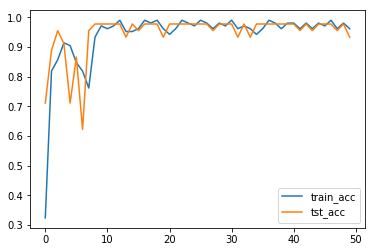

In [28]:
np.random.seed(0)
random.seed(0)

PLA = MultiClsPLA(X_train, y_train, X_test, y_test, 0.001, 50, 4, 3)

PLA.train()
PLA.vis_acc_curve()

#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches

